In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from src.utils import call_option_bsm_formula, call_option_payoff, call_option_delta, call_option_gamma, historical_vol
from src.simulation import simulate_gbm, simulate_bm

In [83]:
DAYS_IN_A_YEAR = 11
SIMULATION_FREQUENCY = 1
HEDGING_FREQUENCY = 0.5
SIMULATION_STEPS_IN_A_YEAR = DAYS_IN_A_YEAR*SIMULATION_FREQUENCY
HEDGING_STEPS_IN_A_YEAR = int(DAYS_IN_A_YEAR*HEDGING_FREQUENCY)
delta_t = SIMULATION_FREQUENCY/HEDGING_FREQUENCY
T_years = 1
S_0 = 100
K = S_0
sigma = 0.2
# t = np.arange(0, SIMULATION_STEPS_IN_A_YEAR + 1, SIMULATION_STEPS_IN_A_YEAR)/SIMULATION_STEPS_IN_A_YEAR
t = np.arange(SIMULATION_STEPS_IN_A_YEAR)/(SIMULATION_STEPS_IN_A_YEAR - 1)
# need to update hedging code to take into account interest rates
r = 0
mu = 0.1

In [96]:
delta_t

2.0

In [84]:
S = S_0*simulate_gbm(T_years, SIMULATION_STEPS_IN_A_YEAR*T_years, mu, sigma, 1)[:, 0]

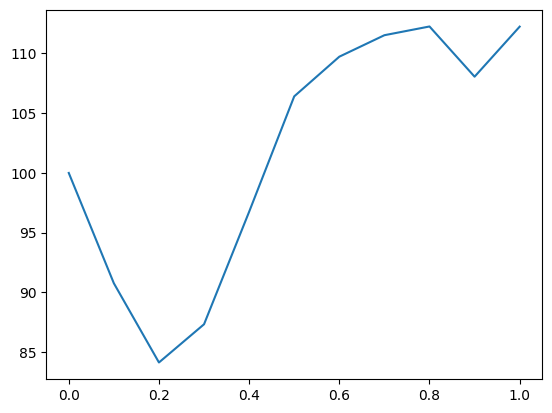

In [85]:
plt.plot(t, S)

In [92]:
def resample_underlying_simulation(S, T, delta_t):
    n_simulation_steps = len(S)
    n_resampling_steps = int(n_simulation_steps/delta_t)
    resampling_steps = np.array([int(delta_t*i) for i in range(n_resampling_steps)])
    S_resampled = S[resampling_steps].copy()
    t = np.arange(n_simulation_steps)/(n_simulation_steps - 1)
    t_resampled = t[resampling_steps].copy()
    return S_resampled, t_resampled

In [93]:
S_resampled, t_r = resample_underlying_simulation(S, T_years, delta_t)

In [94]:
S_resampled

array([100.        ,  84.13358652,  96.75046332, 109.73278859,
       112.26152429])

In [95]:
S

array([100.        ,  90.76424095,  84.13358652,  87.33310763,
        96.75046332, 106.41127565, 109.73278859, 111.5306736 ,
       112.26152429, 108.05833394, 112.24834534])

In [90]:
t

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [91]:
t_r

array([0. , 0.2, 0.4, 0.6, 0.8])